# Week 2a: coincidence problem

In [18]:
'''
Week 2a coincidence problem
'''
from numpy import random

def acquaintance():
    common = False;
    k = 0
    success = 0
    N = 10000
    population = 200000
    frA = 200
    frB = 200
    
    for i in range(N):
        common = False
        s = []
        for j in range(0, frB): # generate friends of B
            while True:
                k = random.randint(1, population)
                if k not in s:
                    break
            s = s + [k];
            ### BEGIN SOLUTION
            if k <= frA:
                common = True
                break
        if common:
            success = success + 1
        ### END SOLUTION
    print('Probability of common acquaintance = %g' % (success/N))
    
### MAIN ###
acquaintance()

Probability of common acquaintance = 0.179


# Week 6a: central limit theorem

In [75]:
### IMPORTS
from numpy import random
import matplotlib.pyplot as plot

### Central limit function
def centrallimit():
    n = 10
    N = 300000
    sum = 0.0
#     file = open("data.txt", "w");
    results = []
    for i in range(N):
        sum = 0.0
        for j in range(n):
            if random.random() < 0.5:
                sum = sum + random.binomial(20, 0.1)
            else:
                sum = sum + random.binomial(20, 0.9);
        results = results + [sum]
    return results
#         file.write("\%g " % sum)
#     write(file, "\%g ", sum);
#     file.close()
    
# def results():
    
    
### MAIN ###
results = centrallimit()

KeyboardInterrupt: 

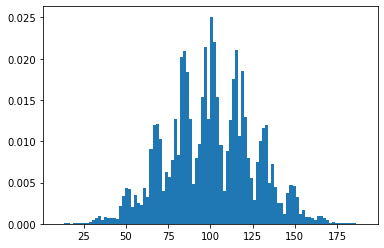

In [71]:
h = plot.hist(results, density = True, bins = 100)

<BarContainer object of 100 artists>

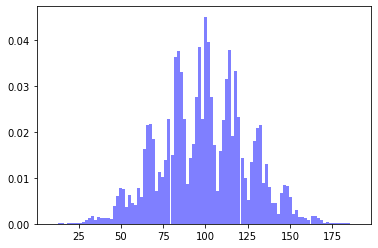

# Week 6a: Confidence intervals for waiting time in single machine station

In [138]:
from Course_4DC10.simChi.core.channel_select import Channel, process, selected, Environment
from dataclasses import dataclass
from numpy import random
from statistics import mean


# =================================
# # Tote definition
# =================================
@dataclass
class Job:
    entrytime: float = 0
    time_entered_buffer: float = 0

# =================================
# # Generator definition
# =================================        
def Generator(env, sending_channel, ta_distribution):
    while True:
        x = Job()
        x.entrytime = env.now
        send = sending_channel.send(x)
        yield env.select(send)
        delay = ta_distribution()
        yield env.timeout(delay)

# =================================
# # Buffer definition
# =================================
def Buffer(env, receiving_channel, sending_channel):
    xs = [] # list of jobs
    while True:
        receiving = receiving_channel.receive() 
        sending = sending_channel.send(xs[0]) if len(xs)>0 else None
        yield env.select(sending,receiving)
        if selected(sending):
            waitingtime.append(env.now - xs[0].time_entered_buffer)
            xs = xs[1:]
        if selected(receiving):
            x = receiving.received_entity
            x.time_entered_buffer = env.now|
            xs = xs + [x]

# =================================
# # Machine definition
# =================================
def Machine(env, receiving_channel, sending_channel, tp_distribution ):
    while True:
        receive = receiving_channel.receive()
        x = yield env.select(receive)
        
        delay = tp_distribution()
        yield env.timeout(delay)
        
        send = sending_channel.send(x)
        yield env.select(send)         

# =================================
# # Exit definition
# =================================
def Exit(env, receiving_channel, nJobs):
    total_flowtime = 0.0
    for j in range(nJobs):
        receive = receiving_channel.receive()
        x = yield env.select(receive)
        flowtime.append(env.now - x.entrytime);

# =================================
## GBME Model
# =================================
def GBME():
    env = Environment()

  
    ta_distribution = lambda: random.uniform(0.0, 2.0)
    tp_distribution = lambda: random.uniform(0.0, 1.0)
    nJobs = 1000

    a = Channel(env)
    b = Channel(env)
    c = Channel(env)

    G = env.process(Generator(env, a, ta_distribution))
    B = env.process(Buffer(env, a, b))
    M = env.process(Machine(env, b, c, tp_distribution))
    E = env.process(Exit(env, c, nJobs))

    env.run(until=E)
    
    mean_waitingtime = mean(waitingtime)
    mean_flowtime = mean(flowtime)
    
    return mean_waitingtime, mean_flowtime

# =================================
## Main
# =================================
for i in range(5):
    flowtime = []
    waitingtime = []
    mean_waitingtime, mean_flowtime = GBME()
    print("Mean waiting time in run %d = %g" % (i+1, mean_waitingtime) )
    

Mean waiting time in run 1 = 0.132566
Mean waiting time in run 2 = 0.125063
Mean waiting time in run 3 = 0.138489
Mean waiting time in run 4 = 0.163399
Mean waiting time in run 5 = 0.18052


# Week 6b: Serial production lines

In [139]:
# =================================
# # Exit definition
# =================================
def Exit(env, receiving_channel, nJobs):
    total_flowtime = 0.0
    for j in range(nJobs):
        receive = receiving_channel.receive()
        x = yield env.select(receive)
        flowtime.append(env.now - x.entrytime);
        print(j, 'has exited the system')

##############
env = Environment()

flowtime = []
waitingtime = []

a = [Channel(env) for c in range(3)] # a channel for each tier, each sending totes
b = [Channel(env) for c in range(3)] # a channel for each tier, each sending totes

G  = env.process(Generator(env, a[0], lambda: random.exponential(0.5)))
B1 = env.process(Buffer(   env, a[0], b[0]))
M1 = env.process(Machine(  env, b[0], a[1], lambda: 0.33))
B2 = env.process(Buffer(   env, a[1], b[1]))
M2 = env.process(Machine(  env, b[1], a[2], lambda: random.uniform(0.0,0.8)))
E  = env.process(Exit(     env, a[2], 100000))

env.run()

print("Mean flowtime = %g" % mean(flowtime) )


0 has exited the system
1 has exited the system
2 has exited the system
3 has exited the system
4 has exited the system
5 has exited the system
6 has exited the system
7 has exited the system
8 has exited the system
9 has exited the system
10 has exited the system
11 has exited the system
12 has exited the system
13 has exited the system
14 has exited the system
15 has exited the system
16 has exited the system
17 has exited the system
18 has exited the system
19 has exited the system
20 has exited the system
21 has exited the system
22 has exited the system
23 has exited the system
24 has exited the system
25 has exited the system
26 has exited the system
27 has exited the system
28 has exited the system
29 has exited the system
30 has exited the system
31 has exited the system
32 has exited the system
33 has exited the system
34 has exited the system
35 has exited the system
36 has exited the system
37 has exited the system
38 has exited the system
39 has exited the system
40 has exi

337 has exited the system
338 has exited the system
339 has exited the system
340 has exited the system
341 has exited the system
342 has exited the system
343 has exited the system
344 has exited the system
345 has exited the system
346 has exited the system
347 has exited the system
348 has exited the system
349 has exited the system
350 has exited the system
351 has exited the system
352 has exited the system
353 has exited the system
354 has exited the system
355 has exited the system
356 has exited the system
357 has exited the system
358 has exited the system
359 has exited the system
360 has exited the system
361 has exited the system
362 has exited the system
363 has exited the system
364 has exited the system
365 has exited the system
366 has exited the system
367 has exited the system
368 has exited the system
369 has exited the system
370 has exited the system
371 has exited the system
372 has exited the system
373 has exited the system
374 has exited the system
375 has exit

683 has exited the system
684 has exited the system
685 has exited the system
686 has exited the system
687 has exited the system
688 has exited the system
689 has exited the system
690 has exited the system
691 has exited the system
692 has exited the system
693 has exited the system
694 has exited the system
695 has exited the system
696 has exited the system
697 has exited the system
698 has exited the system
699 has exited the system
700 has exited the system
701 has exited the system
702 has exited the system
703 has exited the system
704 has exited the system
705 has exited the system
706 has exited the system
707 has exited the system
708 has exited the system
709 has exited the system
710 has exited the system
711 has exited the system
712 has exited the system
713 has exited the system
714 has exited the system
715 has exited the system
716 has exited the system
717 has exited the system
718 has exited the system
719 has exited the system
720 has exited the system
721 has exit

1029 has exited the system
1030 has exited the system
1031 has exited the system
1032 has exited the system
1033 has exited the system
1034 has exited the system
1035 has exited the system
1036 has exited the system
1037 has exited the system
1038 has exited the system
1039 has exited the system
1040 has exited the system
1041 has exited the system
1042 has exited the system
1043 has exited the system
1044 has exited the system
1045 has exited the system
1046 has exited the system
1047 has exited the system
1048 has exited the system
1049 has exited the system
1050 has exited the system
1051 has exited the system
1052 has exited the system
1053 has exited the system
1054 has exited the system
1055 has exited the system
1056 has exited the system
1057 has exited the system
1058 has exited the system
1059 has exited the system
1060 has exited the system
1061 has exited the system
1062 has exited the system
1063 has exited the system
1064 has exited the system
1065 has exited the system
1

1352 has exited the system
1353 has exited the system
1354 has exited the system
1355 has exited the system
1356 has exited the system
1357 has exited the system
1358 has exited the system
1359 has exited the system
1360 has exited the system
1361 has exited the system
1362 has exited the system
1363 has exited the system
1364 has exited the system
1365 has exited the system
1366 has exited the system
1367 has exited the system
1368 has exited the system
1369 has exited the system
1370 has exited the system
1371 has exited the system
1372 has exited the system
1373 has exited the system
1374 has exited the system
1375 has exited the system
1376 has exited the system
1377 has exited the system
1378 has exited the system
1379 has exited the system
1380 has exited the system
1381 has exited the system
1382 has exited the system
1383 has exited the system
1384 has exited the system
1385 has exited the system
1386 has exited the system
1387 has exited the system
1388 has exited the system
1

KeyboardInterrupt: 